### Week 3 Assignment

In [323]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset (.csv provided).

In [324]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


Inspect structure (.info(), .describe(), .head()).


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [273]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [274]:
#Drop ID column because no need for our analysis
df = df.drop('ID', axis=1)
df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [275]:
# Fill in the NaN of Health Issues with "None"
print("Before:", df["Health_Issues"].isna().sum())

# Fill NaN with "None"
df["Health_Issues"] = df["Health_Issues"].fillna("None")

# Check again
print("After:", df["Health_Issues"].isna().sum())

# Inspect unique values
print(df["Health_Issues"].unique()[:20])

Before: 5941
After: 0
['None' 'Mild' 'Moderate' 'Severe']


Make at least 3 visualizations and the interpretation

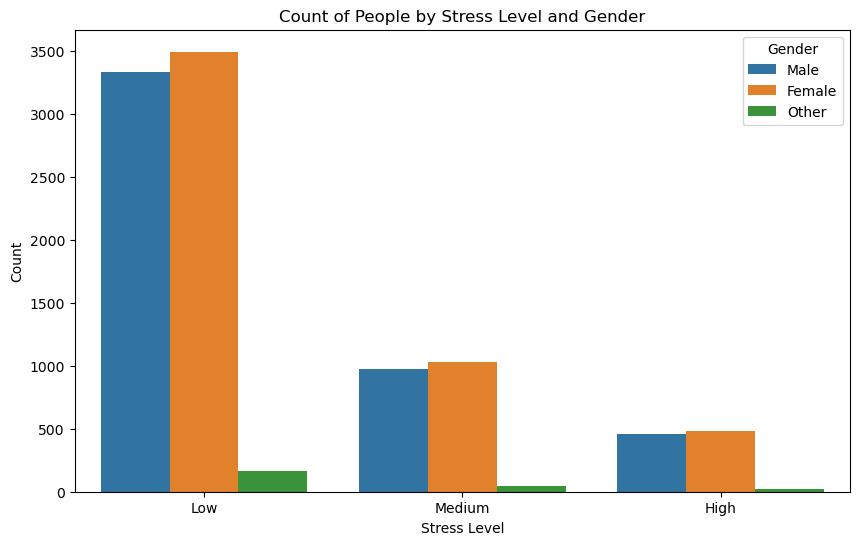

In [276]:
# Stress Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress_Level', hue='Gender', data=df)
plt.title('Count of People by Stress Level and Gender')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

From the bar chart, we can see that female is likely to have higher stress level than male in each stress level category, but the difference isn't drastic, and distribution of data in each category is also not to close, where we can see most people from the dataset tend to have low stress level.

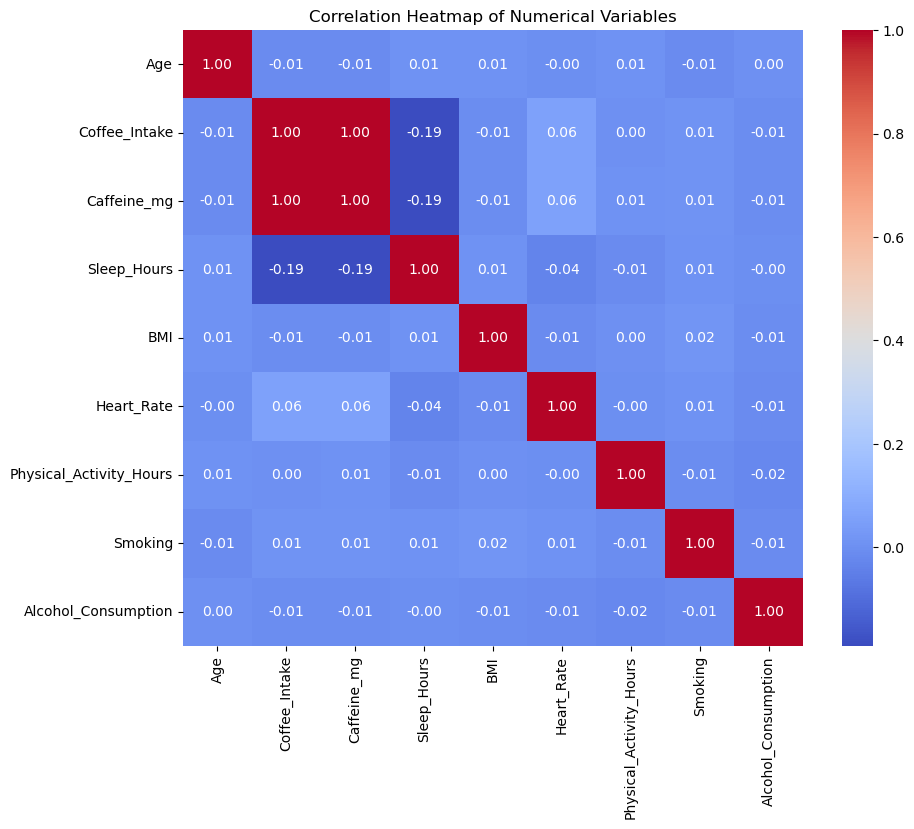

In [277]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

From the heatmap, we can say that coffee_intake and caffeine_mg is perfectly correlated (1), where is true because more coffee intake means higher caffeine consumption. 

But for coffee_intake and sleep_hours (correlation -0.19), there's a negative relationship, where this means coffee is not the only factor affecting sleep, it is correlated but not always. 

There's also a small positive correlation , where heavier coffe drinkers might have slightly higher heart rates , but the effect is weak

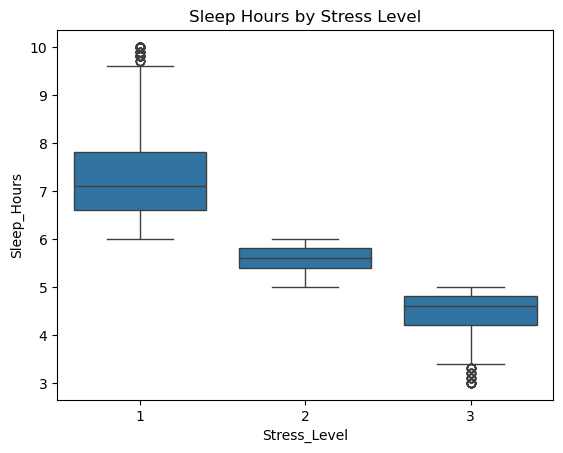

In [315]:
sns.boxplot(x="Stress_Level", y="Sleep_Hours", data=df)
plt.title("Sleep Hours by Stress Level")
plt.show()

From the boxplot we can say that higher stress levels are strongly associated with reduced sleep duration and more extreme cases of very low sleep. We can also see that as stress levels go up, the amount of sleep people get goes down. People with low stress usually sleep around 7 hours with a wider range, while those with moderate stress sleep about 5–6 hours with less variation. At high stress levels, sleep drops further to around 4–5 hours, with some people sleeping very little. This shows that higher stress is linked to less and poorer sleep.

Encode categorical variables.


In [279]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Age: [40 33 42 53 32 44 29 41 37 18 28 22 38 24 52 35 36 21 39 27 31 57 34 20
 19 43 26 47 30 46 51 25 45 64 48 61 23 50 67 80 62 60 56 54 49 59 58 71
 55 65 66 63 73 72 68 70 69 77 75]
Gender: ['Male' 'Female' 'Other']
Country: ['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
Coffee_Intake: [3.5 1.  5.3 2.6 3.1 3.4 2.7 4.5 1.7 4.  4.1 4.7 1.4 3.2 4.3 0.7 2.2 0.
 2.4 4.6 0.4 1.9 0.8 2.5 1.5 2.8 4.4 3.8 2.  3.3 2.1 3.6 1.6 1.1 0.9 4.9
 0.1 5.4 1.3 0.6 1.8 2.9 4.2 2.3 3.9 1.2 7.6 0.2 7.1 5.2 0.5 3.7 5.  6.2
 3.  4.8 5.1 7.3 5.8 5.9 6.1 5.5 5.7 6.4 0.3 5.6 6.7 6.  6.5 6.3 8.2 7.2
 7.  6.6 7.8 6.8 7.7 6.9]
Caffeine_mg: [328.1  94.1 503.7 ... 460.2 509.1  59.1]
Sleep_Hours: [ 7.5  6.2  5.9  7.3  5.3  6.4  7.8  5.5  7.1  8.1  6.5  6.9  6.6  6.8
  7.7  5.7  5.   6.1  6.   8.3  9.2  7.9  4.8  7.4  7.   7.2  5.8  9.4
  7.6  8.   5.4  8.2  6.3  4.5  9.6 

In [ ]:
# Encoding for not ordinal column
gender_map = {
    'Male': 0,
    'Female': 1,
    'Other': 2
}

country_map = {
    'Germany': 0,
    'Brazil': 1,
    'Spain': 2,
    'Mexico': 3,
    'France': 4,
    'Canada': 5,
    'UK': 6,
    'Switzerland': 7,
    'Netherlands': 8,
    'Italy': 9,
    'China': 10,
    'Japan': 11,
    'Belgium': 12,
    'Finland': 13,
    'Australia': 14,
    'USA': 15,
    'Sweden': 16,
    'India': 17,
    'Norway': 18,
    'South Korea': 19
}

occupation_map = {
    'Other': 0,
    'Service': 1,
    'Office': 2,
    'Student': 3,
    'Healthcare': 4
}


# Encoding for ordinal column, use mapping
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
health_issues_map = {'None': 4, 'Mild': 3, 'Moderate': 2, 'Severe' :1}

df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Health_Issues'] = df['Health_Issues'].map(health_issues_map)
df['Gender'] = df['Gender'].map(gender_map)
df['Country'] = df['Country'].map(country_map)
df['Occupation'] = df['Occupation'].map(occupation_map)

df.sample(n = 5)

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
90,36,0,9,1.0,92.8,6.4,3,15.5,86,1,7.5,4,2,0,0
2117,23,1,5,0.0,0.0,6.5,3,28.6,88,1,13.1,4,1,0,0
4835,36,0,15,2.7,252.2,6.0,2,26.9,85,2,6.2,3,0,1,0
5533,37,1,8,4.1,394.2,8.5,4,25.8,59,1,9.3,4,4,0,0
7103,31,1,18,1.4,135.3,6.9,3,23.2,83,1,14.9,4,4,0,0


In [281]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [282]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,0,0,3.5,328.1,7.5,3,24.9,78,1,14.5,0,0,0
1,33,0,0,1.0,94.1,6.2,3,20.0,67,1,11.0,1,0,0
2,42,0,1,5.3,503.7,5.9,2,22.7,59,2,11.2,2,0,0
3,53,0,0,2.6,249.2,7.3,3,24.7,71,1,6.6,0,0,0
4,32,1,2,3.1,298.0,5.3,2,24.1,76,2,8.5,3,0,1


In [283]:
y.head()

0    4
1    4
2    3
3    3
4    3
Name: Health_Issues, dtype: int64

Split dataset into train/test (e.g., 80/20).

In [284]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [285]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [286]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,0,2,4.3,405.6,5.4,2,18.0,86,2,2.4,1,0,1
1561,26,0,17,0.0,0.0,5.5,2,28.3,75,2,10.8,0,0,0
1670,32,0,19,2.8,268.1,7.3,3,27.4,69,1,8.6,2,0,0
6087,18,0,19,2.2,208.6,8.1,4,16.3,83,1,8.9,0,0,1
6669,43,1,6,2.6,251.1,9.4,4,25.4,68,1,3.4,2,0,0


In [287]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,0,18,2.6,245.9,6.7,3,30.1,76,1,1.9,1,0,1
4684,22,1,3,3.1,293.1,7.6,3,20.4,69,1,5.0,1,0,0
1731,30,0,14,3.9,372.4,6.4,3,27.5,75,1,13.8,2,0,0
4742,35,0,0,1.0,92.5,5.3,2,23.1,71,2,2.4,1,0,0
4521,47,0,9,1.3,119.0,6.9,3,28.4,64,1,9.6,2,1,0


Train a Decision Tree Classifier (criterion = GINI).

In [288]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [289]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [290]:
y_pred_gini = clf_gini.predict(X_test)

In [291]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


[Text(0.5, 0.9, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [12, 380, 2885, 4723]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [12, 349, 2085, 0]'),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 140, 2085, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 0, 2079, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 140, 6, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 8, 6, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 132, 0, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [12, 209, 0, 0]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [0, 31, 800, 4723]'),
 Text(0.625, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 5040\nvalue = [0, 0, 317, 4723]')

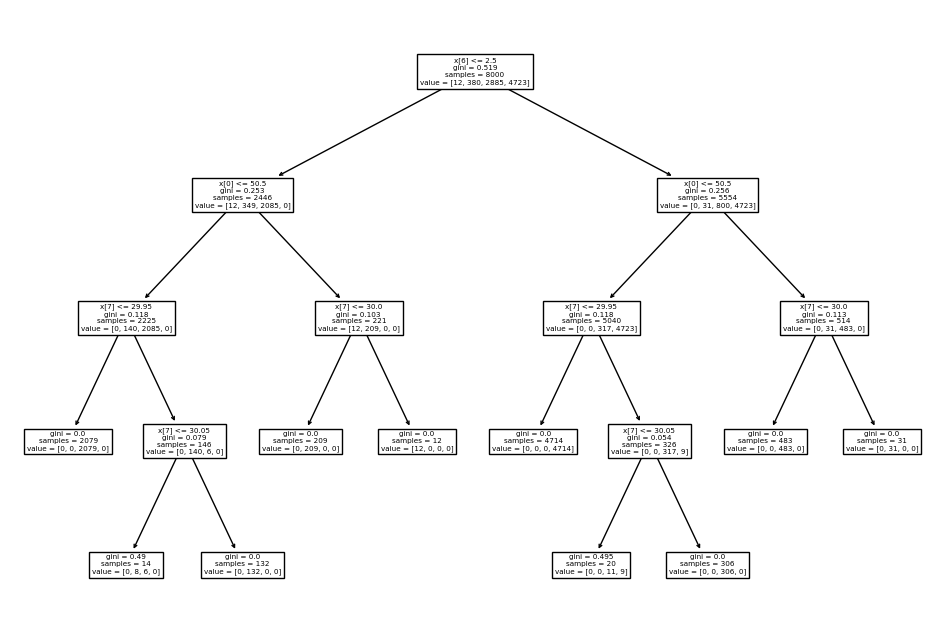

In [292]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

ENTROPY

In [293]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [294]:
y_pred_en = clf_en.predict(X_test)

In [295]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


[Text(0.5, 0.875, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [12, 380, 2885, 4723]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [12, 349, 2085, 0]'),
 Text(0.125, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 140, 2085, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 0, 2079, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 140, 6, 0]'),
 Text(0.375, 0.375, 'x[7] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [12, 209, 0, 0]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [0, 31, 800, 4723]'),
 Text(0.625, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [0, 0, 317, 4723]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 4714\nvalue = [0, 0, 0, 4714]'),
 Text(0.6875, 0.125, 'en

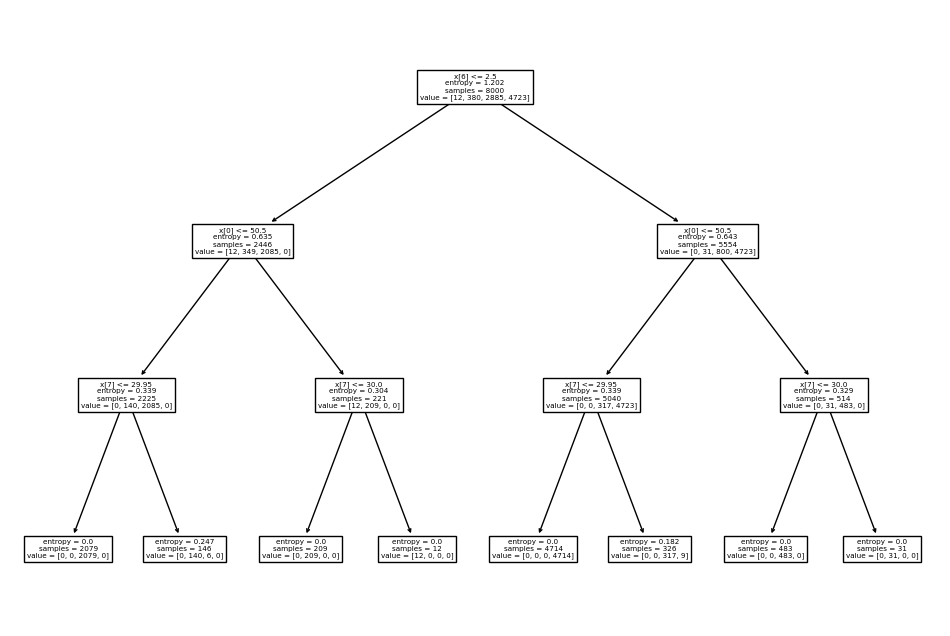

In [296]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

Naive Bayes

In [297]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [298]:
y_pred_nb = nb_classifier.predict(X_test)

In [299]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8570


We can see that the GINI and ENTROYPY model has the same accuracy score, but Naive Bayes has a lower score ,showing that GINI and ENTROPY model performed better than Naive

In [300]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.99      0.99      0.99        83
           3       0.99      1.00      0.99       694
           4       1.00      1.00      1.00      1218

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [318]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.99      0.99      0.99        83
           3       0.99      1.00      0.99       694
           4       1.00      1.00      1.00      1218

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [319]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.71      0.14      0.24        83
           3       0.88      0.70      0.78       694
           4       0.85      1.00      0.92      1218

    accuracy                           0.86      2000
   macro avg       0.61      0.46      0.48      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
# Make a prediction with the gini index model
input_data = {
    'Age': 28,
    'Gender': gender_map['Male'], 
    'Country': country_map['Brazil'],
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': sleep_quality_map['Poor'],
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': stress_level_map['High'],
    'Physical_Activity_Hours': 2,  
    'Occupation': occupation_map['Student'],
    'Smoking': 1,                   
    'Alcohol_Consumption': 1        
}

# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([input_data])

# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)

print("Prediction:", prediction_gini[0])

# reverse dictionary
inverse_prediction_gini = {v:k for k,v in health_issues_map.items()}

print(f"The predicted class for the given input using the gini index model is: {inverse_prediction_gini[prediction_gini[0]]}")

Prediction: 3
The predicted class for the given input using the gini index model is: Mild
